# DT2470 Lab 01: Teh Signal Processings

by Bob L. T. Sturm

In this first lab you will practice some fundamental concepts of signal processing. You will analyse a chosen sampled sound in the time-, frequency-, and time-frequency domains. You will write something intelligent about your analysis, observing things like periodicity, frequency content, harmonicity, etc. You will also learn to extract low-level features from audio and music signals. In the next lab, you will use these features for some machine learning madness.

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python. Here's some helpful links as well:

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [Scipy API](https://docs.scipy.org/doc/scipy/reference/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.

# Part 1: Basics

1. Choose an audio file to work with from http://bbcsfx.acropolis.org.uk. Download it, load it using pydub (see [pydub.AudioSegment](https://github.com/jiaaro/pydub/blob/master/API.markdown)), and plot a portion of the waveform with the appropriate axes labeled "Amplitude" and "Time (s)". The time axis **must be** in seconds. (Use the sample rate of your soundfile to find that.) If your audio file has more than one channel, just look at one channel.

> Below is the first 10 seconds of my selected audio waveform. Yours should appear nearly as beautiful.
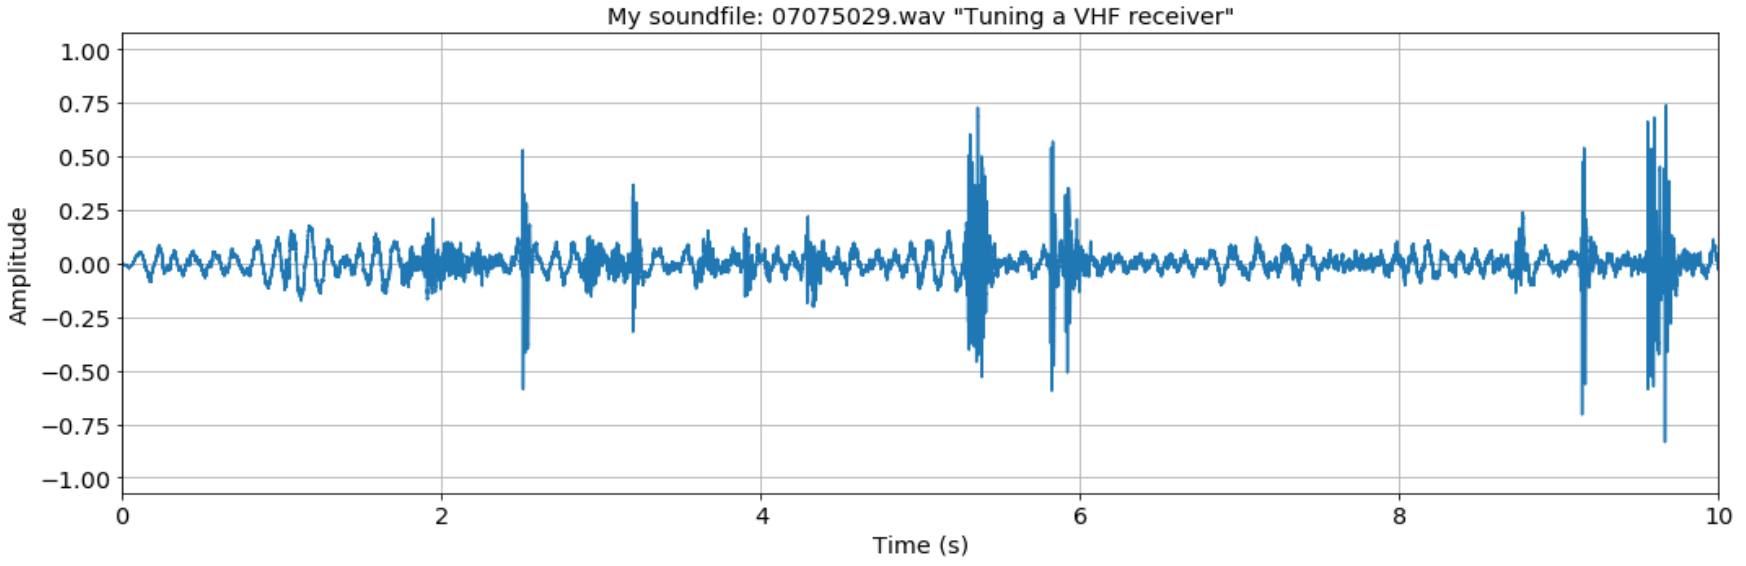

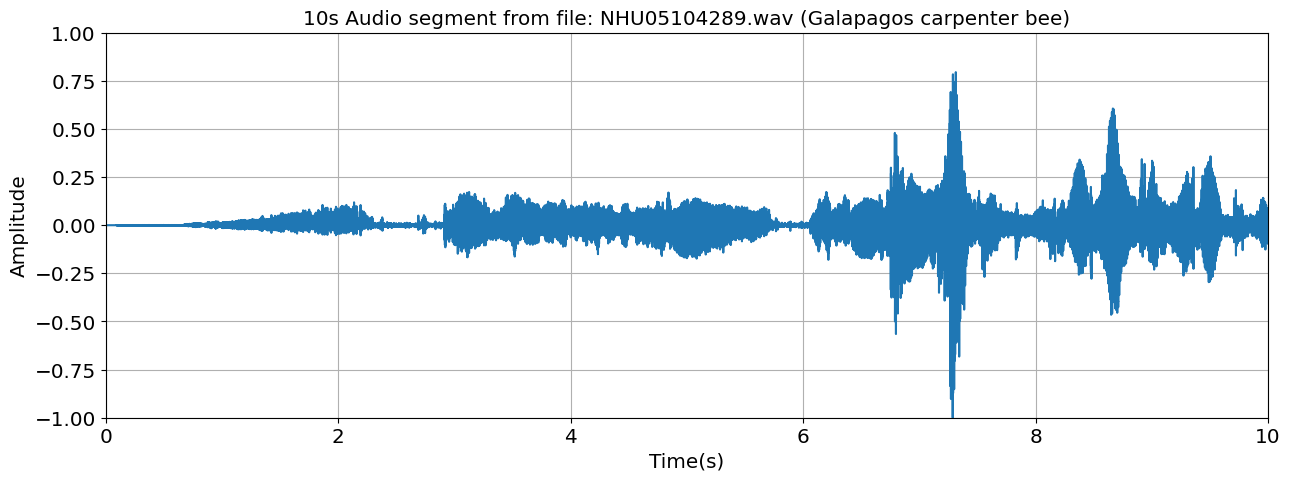

In [1]:
# Now we plot the entire audio file
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, fft
import librosa



# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Import the audio file
starting_time = 0
duration = 10 #s

sound = AudioSegment.from_file("sample01.wav", format="wav")
sound = sound.split_to_mono()[0]
scaling_factor = 1.0 / sound.max #normalization

# Get sample as a numpy array
samples = np.array(sound[starting_time*1000:(starting_time+duration)*1000].get_array_of_samples())*scaling_factor

# Get time values for x-axis
time = np.linspace(starting_time, starting_time+duration, num=len(samples))

# Plot the signal
plt.plot(time, samples)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("10s Audio segment from file: NHU05104289.wav (Galapagos carpenter bee)")
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(-1, 1)
plt.show()



2. With the audio file you have chosen, zoom into two different 100 ms portions that have audio data and plot them. 

>Below is what mine looks like. We can see the sound appears quite different at both times. At  about 2500 ms we see a sudden rise that decays and oscillates. At about 26 s we see a noisy waveform that has a small amplitude. 

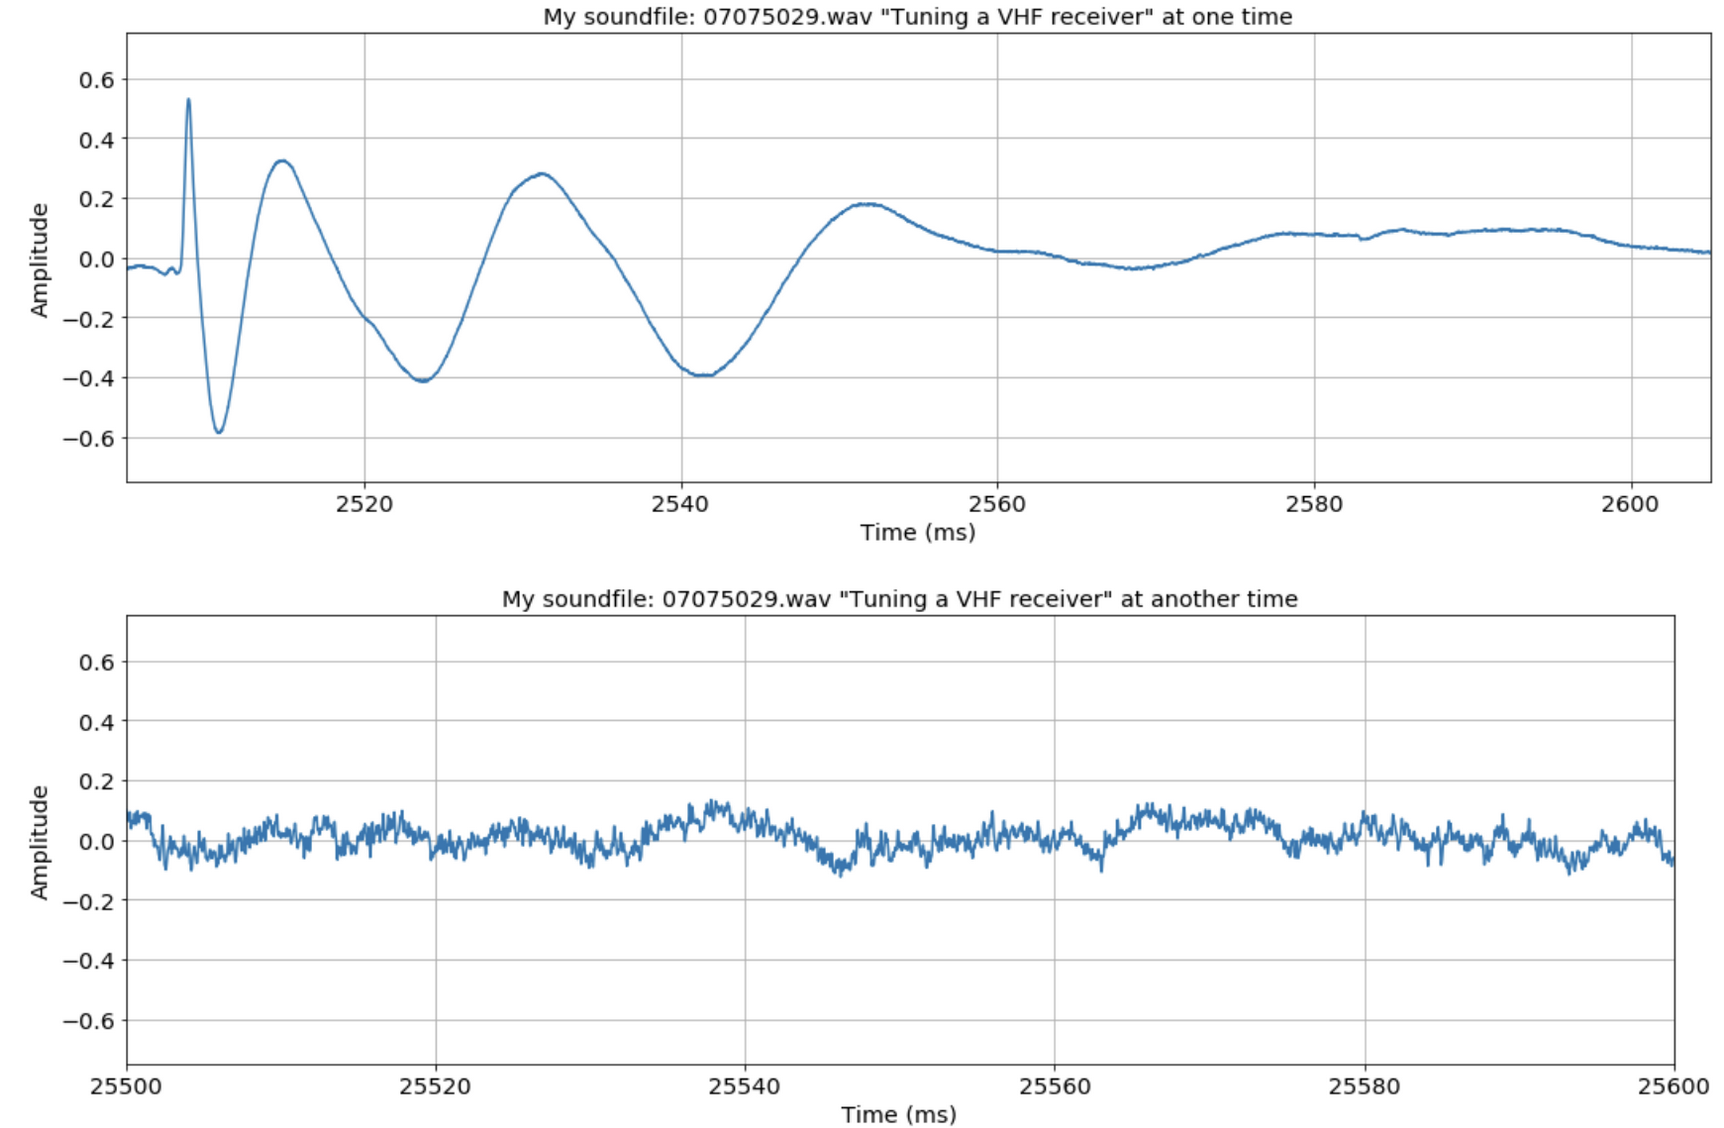

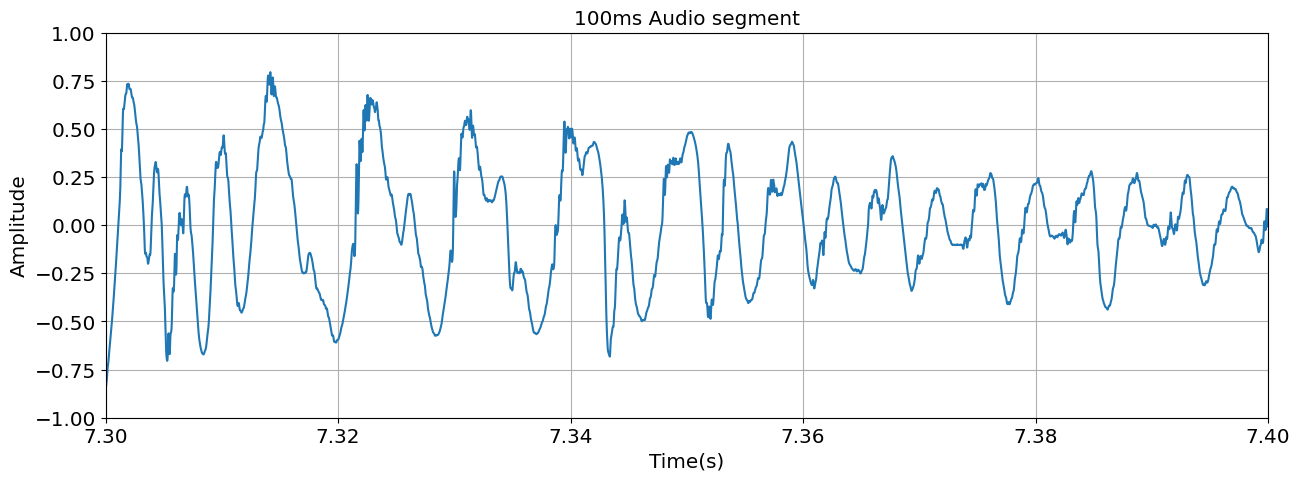

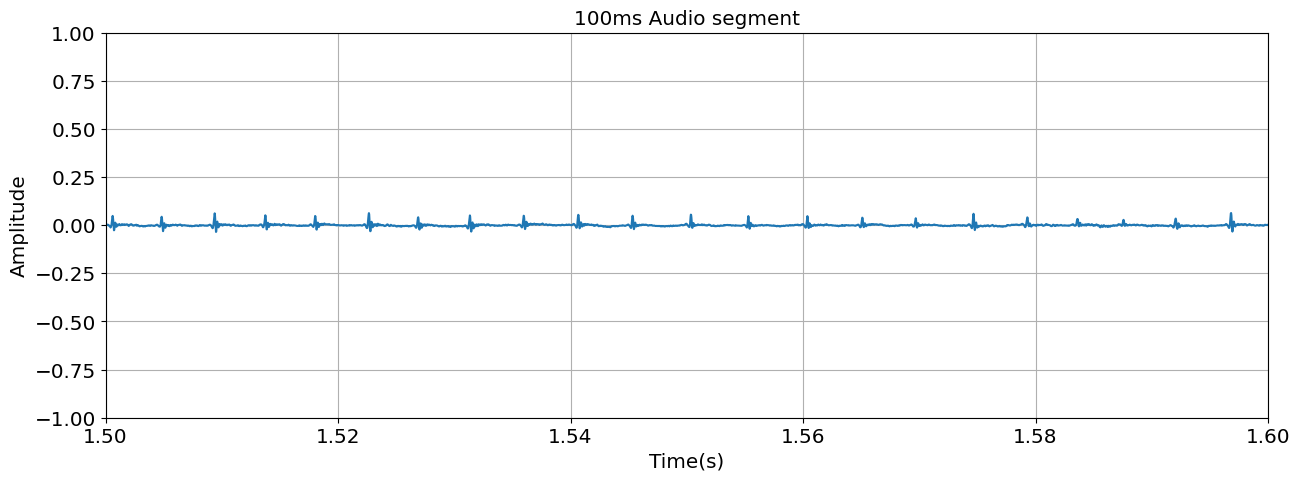

In [2]:
# Chosen time segments
starting_time01 = 7.3
starting_time02 = 1.5
duration = 0.1 #s

# Get samples in the chosen time segments
samples01 = np.array(sound[starting_time01*1000:(starting_time01+duration)*1000].get_array_of_samples())*scaling_factor
samples02 = np.array(sound[starting_time02*1000:(starting_time02+duration)*1000].get_array_of_samples())*scaling_factor

time01 = np.linspace(starting_time01, starting_time01+duration, num=len(samples01))
time02 = np.linspace(starting_time02, starting_time02+duration, num=len(samples02))

# Plot the two portions
plt.plot(time01, samples01)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("100ms Audio segment")
plt.grid(True)
plt.xlim(starting_time01, starting_time01+duration)
plt.ylim(-1, 1)
plt.show()

plt.plot(time02, samples02)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("100ms Audio segment")
plt.grid(True)
plt.xlim(starting_time02, starting_time02+duration)
plt.ylim(-1, 1)
plt.show()


3. For each of the two segments you looked at above, window them with a rectangular window and compute their Fourier transforms. Plot their dB magnitude spectra. Appropriately label your axes with "Magnitude (dB)" and "Frequency (kHz)". The frequency axis **must be** in kiloHertz, and limited to 0 to the Nyquist frequency (half the sampling rate). Then do the same but using the Hann window.

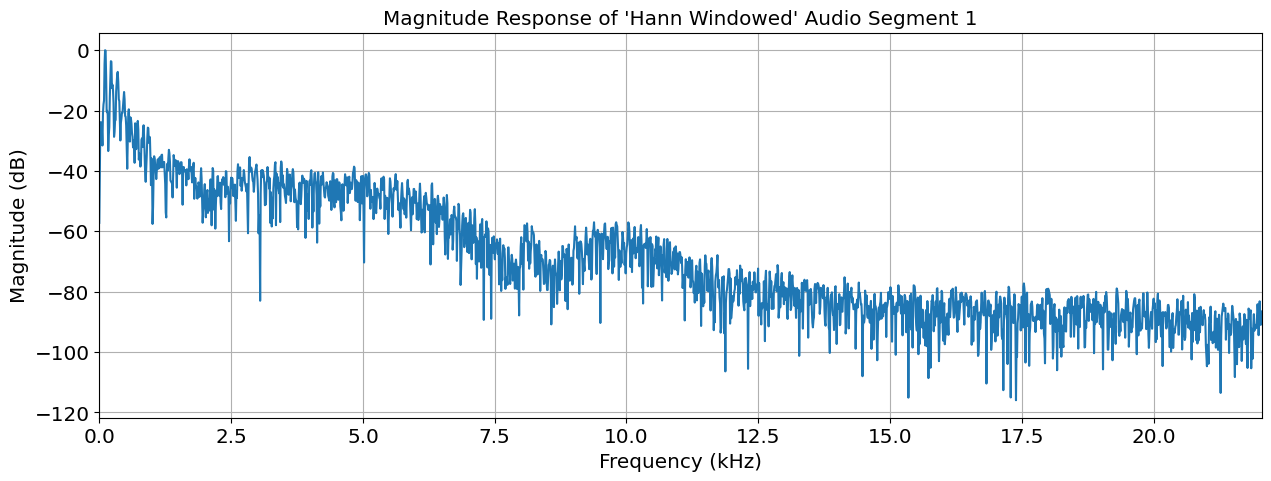

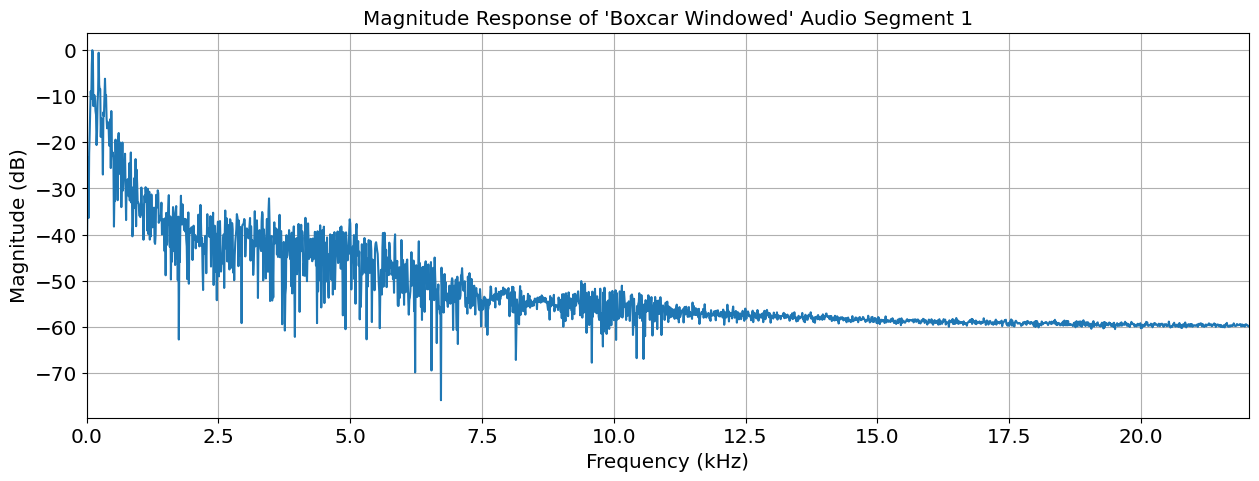

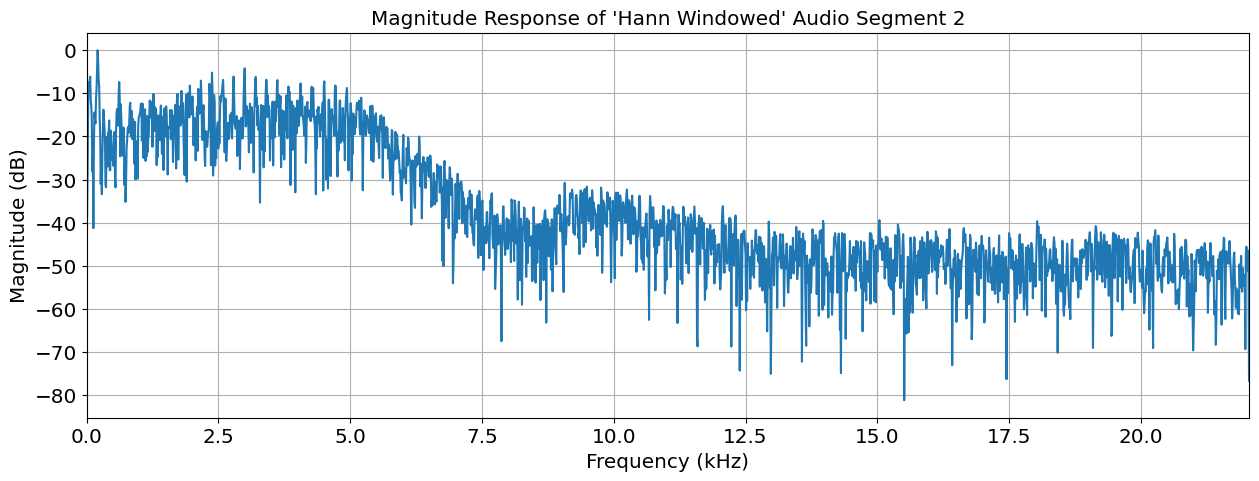

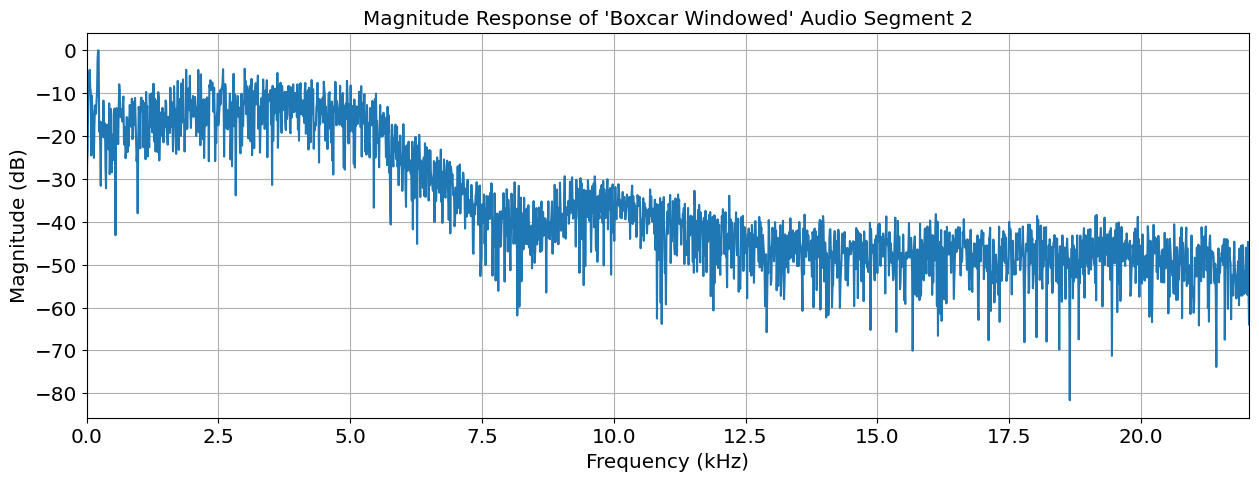

In [4]:
# Returns frequency and magnitude of the fft of an audio segment
def get_fft_freq_and_magnitude(audio_segment, window_type, sample_rate):
    n_samples = len(audio_segment)
    
    # get window based on window type
    if(window_type == 'boxcar'): window = signal.windows.boxcar(n_samples, sym=False) * audio_segment
    elif(window_type == 'hann'): window = signal.windows.hann(n_samples, sym=False) * audio_segment
    
     #we use n_samples // 2 so that we get the positive frequencies only
    freq_array_khz = np.linspace(0, sample_rate / 2, n_samples // 2 + 1) / 1000

    fft_segment = fft.fft(window)

    fft_magnitude = np.abs(fft_segment)[:n_samples // 2 + 1]
    db_fft_magnitude = 20 * np.log10(fft_magnitude/np.max(fft_magnitude))

    return freq_array_khz, db_fft_magnitude

# Plots the magnitude response of an audio segment
def plot_plot(x, y, x_label, y_label, title):
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xlim(0, max(x))
    plt.grid(True)
    plt.show()

sample_rate = sound.frame_rate
# Frequency and magnitude of the fft of the two audio segments
freq_hann_khz_1, db_magnitude_hann_1 = get_fft_freq_and_magnitude(samples01, 'hann', sample_rate)
freq_hann_khz_2, db_magnitude_hann_2 = get_fft_freq_and_magnitude(samples02, 'hann', sample_rate)
    
freq_boxcar_khz_1, db_magnitude_boxcar_1 = get_fft_freq_and_magnitude(samples01, 'boxcar', sample_rate)
freq_boxcar_khz_2, db_magnitude_boxcar_2 = get_fft_freq_and_magnitude(samples02, 'boxcar', sample_rate)

# Plot the data
plot_plot(freq_hann_khz_1, db_magnitude_hann_1, "Frequency (kHz)", "Magnitude (dB)", title="Magnitude Response of 'Hann Windowed' Audio Segment 1")
plot_plot(freq_boxcar_khz_1, db_magnitude_boxcar_1, "Frequency (kHz)", "Magnitude (dB)", title="Magnitude Response of 'Boxcar Windowed' Audio Segment 1")
plot_plot(freq_hann_khz_2, db_magnitude_hann_2, "Frequency (kHz)", "Magnitude (dB)", title="Magnitude Response of 'Hann Windowed' Audio Segment 2")
plot_plot(freq_boxcar_khz_2, db_magnitude_boxcar_2, "Frequency (kHz)", "Magnitude (dB)", title="Magnitude Response of 'Boxcar Windowed' Audio Segment 2")


4. For the first 10 seconds of your audio file, compute and plot its dB magnitude short-time Fourier transform using a Hann window of duration 25 ms with a window hopsize of 10 ms, and an FFT size of 8192 samples. Do the same using a Hann window of duration 100 ms with a window hopsize of 10 ms. Appropriately label your axes with "Frequency (kHz)" and "Time (s)". The frequency axis must be in kiloHertz, and limited to 0 to 5 kHz. The time axis must be in seconds. Choose a colormap that you feel describes your personality (https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html). See [scipy.signal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) for help.

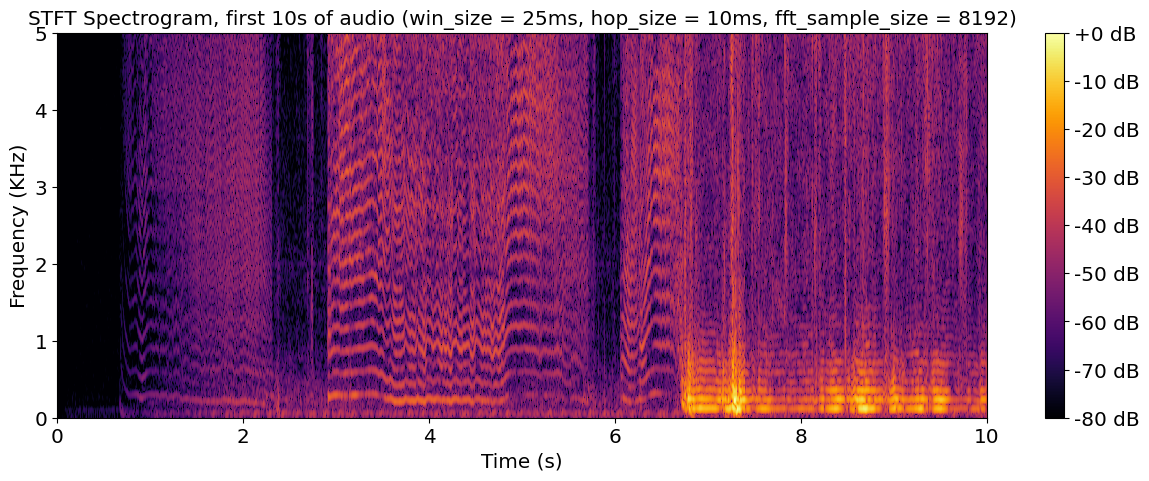

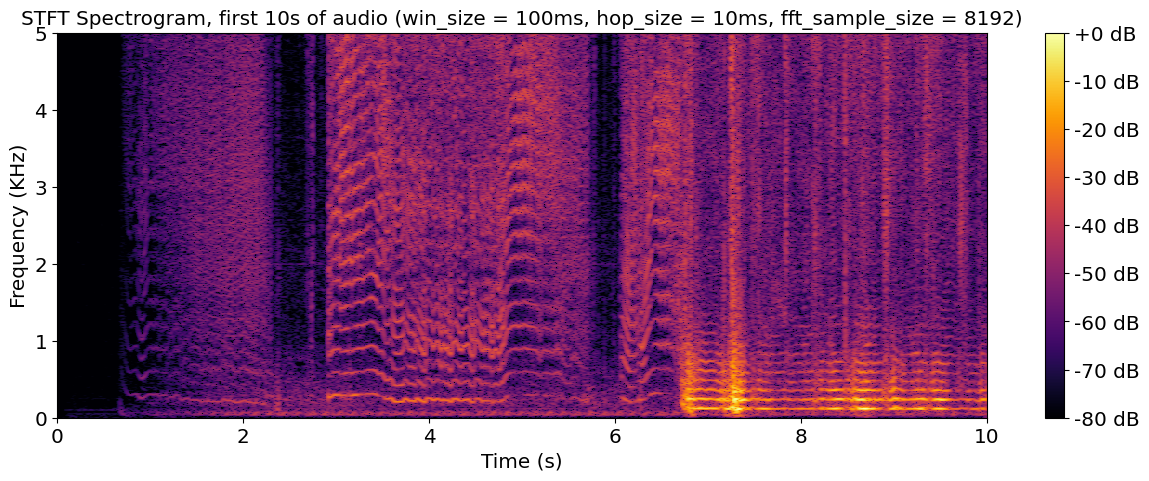

In [5]:
# Plots the stft spectrogram of an audio segment
def plot_stft_from_audio_segment(audio_segment, window_type, window_size, hop_size, fft_sample_size, sample_rate, plot_title):
    overlapping_samples = sample_rate*(window_size - hop_size)
    
    frequency, time, stft_matrix = signal.stft(
        audio_segment, 
        fs=sample_rate, 
        window=window_type, 
        nperseg=int(window_size*sample_rate),
        nfft=fft_sample_size, 
        noverlap=overlapping_samples)

    # Convert to kHz
    frequency = frequency / 1000
    # Get stft amplitude and convert to dB
    stft_amplitude = np.abs(stft_matrix)
    stft_db = librosa.amplitude_to_db(stft_amplitude, ref=np.max)

    # Plot the spectrogram
    plt.title(plot_title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (KHz)')
    plt.ylim((0,5)) # limit to 5kHz the frequency axis
    plt.pcolormesh(time, frequency, stft_db, cmap='inferno')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# First 10s of the audio file
starting_time = 0
duration = 10 #s

# Plot the stft spectrogram of the first 10s with the given parameters

plot_stft_from_audio_segment(
    samples, 
    window_type='hann', 
    window_size=0.025, 
    hop_size=0.01, 
    fft_sample_size=8192, 
    sample_rate=sample_rate, 
    plot_title="STFT Spectrogram, first 10s of audio (win_size = 25ms, hop_size = 10ms, fft_sample_size = 8192)"
    )

plot_stft_from_audio_segment(
    samples, 
    window_type='hann', 
    window_size=0.100, 
    hop_size=0.01, 
    fft_sample_size=8192, 
    sample_rate=sample_rate, 
    plot_title="STFT Spectrogram, first 10s of audio (win_size = 100ms, hop_size = 10ms, fft_sample_size = 8192)"
    )



5. Describe some of the advantages and nackdelar of using short or long time windows for time-frequency analysis.


Using short or long time windows for time-frequency analysis is a trade-off between time and frequency resolution. <br>
A <b>short</b> time window will give a good time resolution but a poor frequency resolution; short time windows also provide a high level of temporal detail and can capture rapid changes in a signal. <br> A <b>long</b> time window will give a good frequency resolution but a poor time resolution, thus it is suitable for analysing low-frequency components of the signal or for detecting the presence of a particular frequency component. <br>
The choice of window length is therefore a compromise between the two, depending on the application. <br>

6. For the first 10 seconds of your audio file, use the [librosa package](https://github.com/librosa) to compute its Mel spectrogram using Hann windows of duration 25 ms with a window hopsize of 10 ms. Use 128 Mel bands and an FFT size of 8192 samples. Display the dB magnitude with reference to the max power observed, and limit your y-axis between 0 and 5 kHz. Use the same colormap as you used above. See https://github.com/librosa/librosa/blob/main/examples/LibROSA%20demo.ipynb for help. 

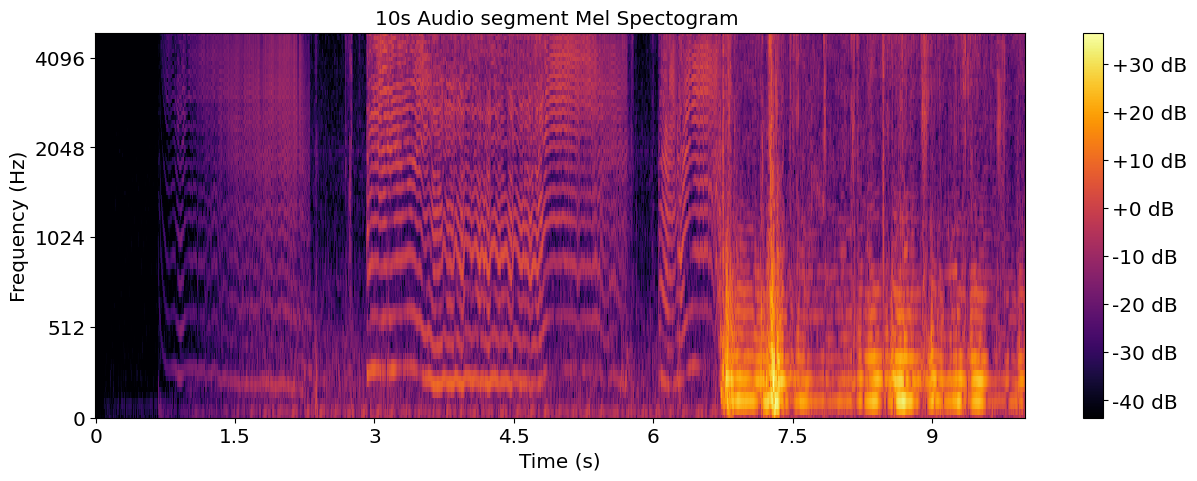

In [6]:
starting_time = 0
duration = 10 #s

# Use librosa to compute the mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(
    y=samples, 
    sr=sample_rate, 
    n_fft=8192, 
    hop_length=int(sample_rate*0.01), 
    n_mels=128, 
    win_length=int(sample_rate*0.025),
    window='hann',
    )

# Convert to dB
mel_spectrogram_db = librosa.power_to_db(abs(mel_spectrogram))

# Plot the mel spectrogram
plt.figure(figsize=(15, 5))

librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, hop_length=int(sample_rate*0.01), x_axis='time', y_axis='mel', cmap='inferno')

plt.colorbar(format='%+2.0f dB')
plt.title("10s Audio segment Mel Spectogram ")
plt.ylim((0,5000)) #as requested in the task, limit to 5kHz the frequency axis
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

# Part 2: Extracting features

1. Write a function that will take in the samples of an audio file, a frame size in samples, a frame hop size in samples, and compute and return the number of waveform zero crossings in each frame. A waveform x[n] undergoes a zero crossing when sign(x[n]) and sign(x[n+1]) are different. You will have to slice x[n] into chunks of a specified size, and for each of those chunks, count the number of sign changes.

In [8]:
# Returns number of zero crossings in each frame
def num_zeros(samples, frame_size, hop_size):
    n_samples=len(samples)
    
    # Each element of the array will contain the number of zero crossings in a frame
    output = []

    # Number of frames based on the given frame size and hop size
    n_frames = (n_samples-frame_size)//hop_size+1

    # For every frame, count the number of zero crossings
    for i in range(n_frames):

        start_sample = i*hop_size
        end_sample = start_sample + frame_size

        counter = 0
        # For every sample in the frame, check if the sign changes
        for j in range(start_sample,end_sample-1):
            if np.sign(samples[j]) != np.sign(samples[j+1]):
                counter += 1

        output.append(counter)

    return output

2. Using your function, compute zero crossings of 46 ms frames hopped 50% of that for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of zero crossings you extracted.

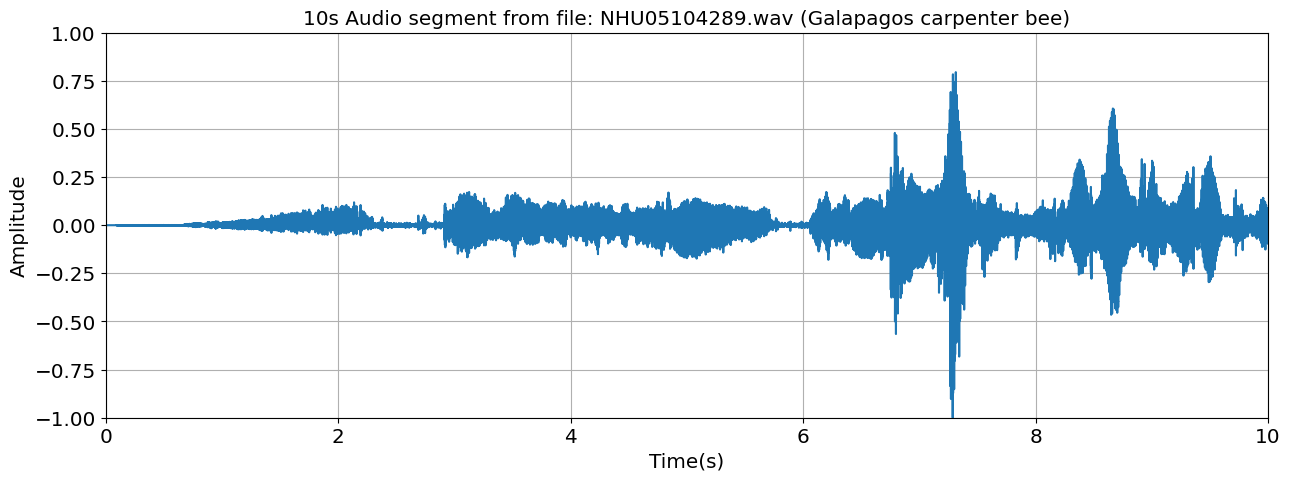

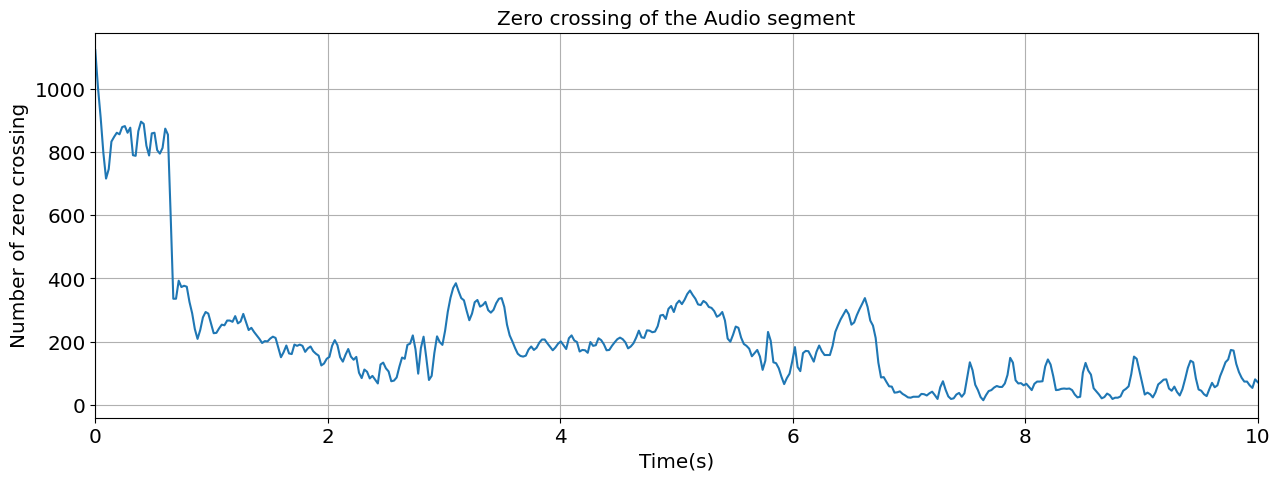

In [9]:

starting_time = 0
duration = 10 #s

frame_length = 46 #ms
hop_perc = 0.50

# Revtrieve the number of frames with the given frame length
frame_size = int(sound.frame_count(ms=frame_length))
hop_size = int(hop_perc*frame_size)
samples = sound[starting_time*1000:(starting_time+duration)*1000].get_array_of_samples()

# Get the number of zero crossings in each frame with the function previously defined
zeros = num_zeros(samples,frame_size,hop_size)

# Plot the waveform
time01 = np.linspace(starting_time, starting_time+duration, num=len(samples))
scaled_samples = np.array(samples)*scaling_factor

plt.plot(time01, scaled_samples)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("10s Audio segment from file: NHU05104289.wav (Galapagos carpenter bee)")
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(-1, 1)
plt.show()

# Plot the number of zero crossings
time02 = np.linspace(starting_time, starting_time+duration, num=len(zeros))

plt.plot(time02, zeros)
plt.xlabel("Time(s)")
plt.ylabel("Number of zero crossing")
plt.title("Zero crossing of the Audio segment")
plt.grid(True)
plt.xlim(0, 10)
plt.show()



3. Write a function that will take in the samples of an audio file, a frame size in samples, a hop size in samples, and a sampling rate, and compute and return the spectral centroid of each frame. The spectral centroid of a rectangular window of audio $x[n]$ of length $N$ (even) is defined as 
$$ R_{0.5}(x) = \frac{\sum_{k=0}^{N/2+1} \frac{F_s k}{N} |X[k]|}{\sum_{k=0}^{N/2+1} |X[k]|} $$
where $X[k]$ is the DFT of $x[n]$, and $F_s$ is the sampling rate.

In [11]:
# Returns the spectral centroid of each frame
def compute_spectral_centroids(samples, frame_size, hop_size, sampling_rate):
    n_samples=len(samples)

    # Each element of the array will contain the spectral centroid of a frame
    output = []

    # Number of frames based on the given frame size and hop size
    n_frames = (n_samples-frame_size)//hop_size+1
    
    for i in range(n_frames):
        
        # Start and end of the frame
        start_frame = i * hop_size
        end_frame = start_frame + frame_size

        frame = samples[start_frame:end_frame]

        # Compute the fft of the frame and its magnitude spectrum
        fft_frame = fft.fft(frame)
        magnitude_spectrum = np.abs(fft_frame)

        # Calculate spectral centroid (we selected only the samples related to positive frequencies)
        centroid_numerator = np.sum((np.arange(frame_size//2 + 1) * sampling_rate / frame_size) * magnitude_spectrum[:frame_size//2 + 1])
        centroid_denominator = np.sum(magnitude_spectrum[:frame_size//2 + 1])
        
        spectral_centroid = centroid_numerator / centroid_denominator
        output.append(spectral_centroid)
    
    return output




4. Using your function, compute spectral centroid features for contiguous 46 ms frames hopped 50% for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of spectral centroids you extracted.

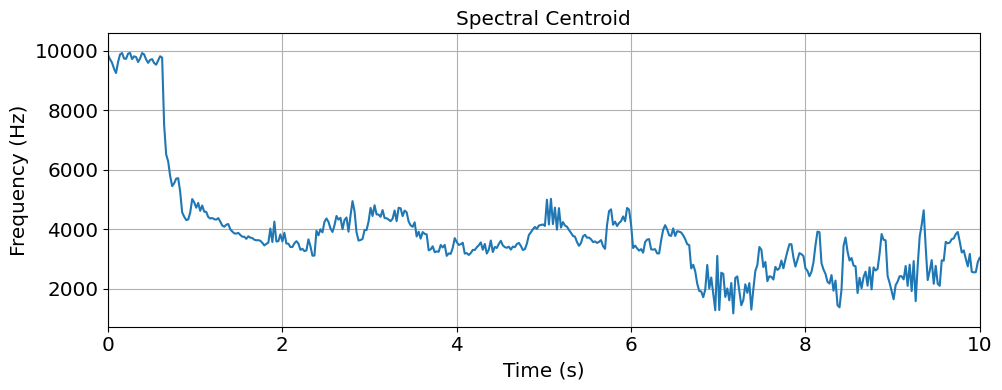

In [12]:
frame_length = 46 #ms
hop_perc = 0.50

# Revtrieve the number of frames with the given frame length
frame_size = int(sound.frame_count(ms=frame_length))
hop_size = int(hop_perc*frame_size)
samples = sound.get_array_of_samples()
sampling_rate = sound.frame_rate

# Use the function previously defined to compute the spectral centroid
centroids = compute_spectral_centroids(samples,frame_size,hop_size,sampling_rate)

# Create a time array for plotting
time = np.arange(0, len(centroids)) * hop_size / sampling_rate

# Plot the spectral centroids
plt.figure(figsize=(10, 4))
plt.plot(time,centroids)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Centroid')
plt.grid()
plt.tight_layout()
plt.xlim(0, 10)
plt.show()

5. Using the librosa package (https://github.com/librosa), extract the first 10 MFCC features from your audio file using Hann windows of 25 ms duration and 10 ms hop size, and an FFT size of 8192 samples. Display the extracted MFCCs for the first 10 seconds.

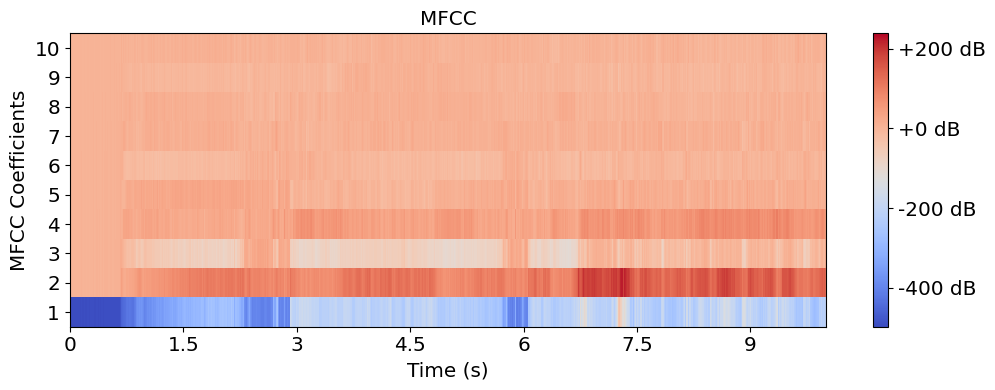

In [27]:
audio_file_path = 'sample01.wav'
y, sr = librosa.load(audio_file_path, sr=None)

start_time = 0
end_time = 10
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

y = y[start_sample:end_sample]

# Extract the desired audio segment
segment = y[start_sample:end_sample]

n_mfcc = 10
hop_length = int(sr * 0.01)  # 10 ms hop size
n_fft = 8192
win_length = int(sr * 0.025)  # 25 ms window size

# Compute MFCCs based on provided parameters
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft, win_length=win_length)

# Plot the extracted MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr, hop_length=hop_length)
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
y_ticks_positions = np.arange(0, n_mfcc)
y_ticks_labels = [str(i) for i in range(1, n_mfcc + 1)]
plt.yticks(y_ticks_positions, y_ticks_labels)
plt.show()